## Regression Pipeline

1. Get data.
2. Split into train and test.
3. Fit a model in the train set. Optional: Use cross validation to do that.
4. Measure model performance.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Get data

In [41]:
from sklearn.datasets import load_boston

In [42]:
boston = load_boston()

In [43]:
#print(boston.DESCR)

In [44]:
X, y = boston.data, boston.target

In [45]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [46]:
y[0]

24.0

## 2. Split into train and test

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

c:\users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [49]:
X_train.shape

(404, 13)

In [50]:
X.shape

(506, 13)

## 3. Create model

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression(normalize=True)

In [53]:
# Train the model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [54]:
lr.coef_

array([-1.12463481e-01,  3.00810168e-02,  4.07309919e-02,  2.78676719e+00,
       -1.72406347e+01,  4.43248784e+00, -6.23998173e-03, -1.44848504e+00,
        2.62113793e-01, -1.06390978e-02, -9.16398679e-01,  1.24516469e-02,
       -5.09349120e-01])

In [55]:
lr.intercept_

30.288948339368964

In [56]:
np.dot(X[5], lr.coef_)+lr.intercept_

25.373318544172125

In [57]:
y[5]

28.7

## 4. Model validation

In [58]:
lr.score(X_test, y_test) # R^2 metric (1 is good, 0 is bad, negative is worse than baseline.)

0.6684825753971604

In [59]:
y_pred = lr.predict(X_test)

In [60]:
mesh = np.linspace(0,50, 100)

Text(0,0.5,'Predictions')

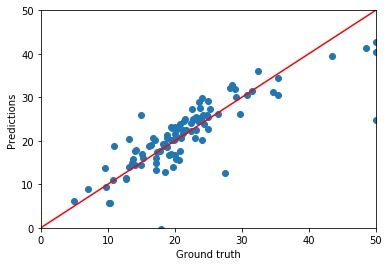

In [61]:
plt.scatter(y_test, y_pred)
plt.plot(mesh, mesh, 'r')
plt.xlim(0,50)
plt.ylim(0, 50)
plt.xlabel('Ground truth')
plt.ylabel('Predictions')